# Book 3: Modelling & Evaluation Part 1 - Text Classification

---
This project consist of 4 separate notebook:

1. Book 1 - ProblemStatement & DataCollection 
2. Book 2 - Preprocessing
3. Book 3 - Modelling & Evaluation Part 1 - Text Classification
4. Book 4 - Modelling & Evaluation Part 2 - Sentiment Analysis

This book focus in modelling and evaluating the scores to determine the best performer as the production model.

## 1.0 Libraries Import

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *


## 2.0 Data Import

---

In [2]:
main_df = pd.read_csv('./data/main_data.csv')
print(f"Data shape: {main_df.shape}")
main_df.info()

Data shape: (19241, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19241 entries, 0 to 19240
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                19241 non-null  int64 
 1   subreddit            19241 non-null  int64 
 2   num_comments         19241 non-null  int64 
 3   created_utc          19241 non-null  int64 
 4   author               19241 non-null  object
 5   title_word_count     19241 non-null  int64 
 6   title_length         19241 non-null  int64 
 7   post                 19241 non-null  object
 8   post_port_stemmed    19241 non-null  object
 9   post_snow_stemmed    19241 non-null  object
 10  post_unstemmed       19241 non-null  object
 11  post_demojized_only  19241 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.8+ MB


## 3.0 Text Classification Modelling

---

### 3.1 Feature and Response Separation & Train/Test Split

- Two Train/Test Split data were created using Snowball Stemmed and Porter Stemmed data for performance comparison
- The best performer will be subsequently used for modelling

#### 3.1.1 Train/Test Split with Snowball Stemmed Data

In [3]:
# Feature and response separation
X = main_df['post_snow_stemmed']
y = main_df['subreddit']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

#### 3.1.2 Train/Test Split with Porter Stemmed Data

In [4]:
# Feature and response separation
X_port = main_df['post_port_stemmed']
y_port = main_df['subreddit']

# Split the data into the training and testing sets.
X_port_train, X_port_test, y_port_train, y_port_test = train_test_split(X_port,
                                                    y_port,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

### 3.2 Baseline Model

- Multinomial with countvectorizer was used as the baseline model
- Minimum document frequency was set to 100 to reduce the features
- Accuracy score was used because the response has a balance set of data between the classes.
- The baseline will run twice, once with porter stemmer and another with snowball stemmer to compare the result.
- Both stemmer produced similar results, therefore, Porter stemmer, being the older version was dropped.

#### 3.2.1 Multinomial Naive Bayes with Snowball Stemmer

In [5]:
# Initialize countvectorizer
cvec = CountVectorizer(min_df=100)

# X_train data is fitted and transfromed using the countvectorizer
X_train_cvec = pd.DataFrame(
                            cvec.fit_transform(X_train).todense(),
                            columns = cvec.get_feature_names()
                            )
# X_test will be transformed using the countvectorizer.
# Any new words that are found in the test data set will not be included.
X_test_cvec = pd.DataFrame(
                            cvec.transform(X_test).todense(),
                            columns = cvec.get_feature_names()
                            )

print(f'Train data shape: {X_train_cvec.shape}')
print(f'Test data shape: {X_test_cvec.shape}')

# Initialize Multinomial Naive Bayes as the baseline model
baseline_nb = MultinomialNB()

# Fit the model
baseline_nb_model = baseline_nb.fit(X_train_cvec, y_train)

# Generate prediction
y_pred_nb = baseline_nb.predict(X_test_cvec)

# Score our model on the training set
print(f'Train data accuracy score: {baseline_nb_model.score(X_train_cvec, y_train)}')
print(f'Train data cross-validation score: {cross_val_score(baseline_nb, X_train_cvec,y_train, cv = 5).mean()}')
print(f'Test score: {baseline_nb_model.score(X_test_cvec, y_test)}')

Train data shape: (15392, 538)
Test data shape: (3849, 538)
Train data accuracy score: 0.8731808731808732
Train data cross-validation score: 0.8715563583275246
Test score: 0.8719147830605352


#### 3.2.2 Multinomial Naive Bayes with Porter Stemmer

In [17]:
# Initialize countvectorizer
cvec = CountVectorizer(min_df=100)

# X_train data is fitted and transfromed using the countvectorizer
X_train_cvec = pd.DataFrame(
                            cvec.fit_transform(X_port_train).todense(),
                            columns = cvec.get_feature_names()
                            )
# X_test will be transformed using the countvectorizer.
# Any new words that are found in the test data set will not be included.
X_test_cvec = pd.DataFrame(
                            cvec.transform(X_port_test).todense(),
                            columns = cvec.get_feature_names()
                            )

print(f'Train data shape: {X_train_cvec.shape}')
print(f'Test data shape: {X_test_cvec.shape}')

# Initialize Multinomial Naive Bayes as the baseline model
baseline_nb = MultinomialNB()

# Fit the model
baseline_nb_model = baseline_nb.fit(X_train_cvec, y_train)

# Generate prediction
y_pred_nb = baseline_nb.predict(X_test_cvec)

# Score our model on the training set
print(f'Train data accuracy score: {baseline_nb_model.score(X_train_cvec, y_train)}')
print(f'Train data cross-validation score: {cross_val_score(baseline_nb, X_train_cvec,y_train, cv = 5).mean()}')
print(f'Test score: {baseline_nb_model.score(X_test_cvec, y_test)}')

Train data shape: (15392, 530)
Test data shape: (3849, 530)
Train data accuracy score: 0.8734407484407485
Train data cross-validation score: 0.8714264882250614
Test score: 0.8719147830605352


### 3.3 AutoML with PyCaret

- PyCaret requires an input in the format of a dataframe which includes the predictors and the response, therefore, a new train test split was created to suit the input requirements
- Countvectorizer was used as the transformer before the data is fitted into the PyCaret

#### 3.3.1 Data Preparation for PyCaret

In [8]:
# Train test split for PyCaret
W = main_df
z = main_df['subreddit']

# Split the data into the training and testing sets.
W_train, W_test, z_train, z_test = train_test_split(W,
                                                    z,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

W_train = W_train.reset_index(drop=True)

# Transformer for PyCaret
cvec = CountVectorizer(min_df=100)

W_train_cvec = pd.DataFrame(
                            cvec.fit_transform(W_train['post_snow_stemmed']).todense(),
                            columns = cvec.get_feature_names()
                            )

W_test_cvec = pd.DataFrame(
                            cvec.transform(W_test['post_snow_stemmed']).todense(),
                            columns = cvec.get_feature_names()
                            )
print(f'Train data shape: {W_train_cvec.shape}')
print(f'Train data shape: {W_test_cvec.shape}')

# Add response variable back to the dataframe
W_train_cvec['subreddit'] = W_train['subreddit']
W_train_cvec.shape

#### 3.3.2 PyCaret Initialization

- Specify data and target

In [11]:
# Setup PyCaret
s = setup(W_train_cvec, target = 'subreddit', session_id=123)

,Description,Value
0,session_id,123
1,Target,subreddit
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15392, 539)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,536
8,Ordinal Features,False
9,High Cardinality Features,False


#### 3.3.3 Execute PyCaret Model Comparison

- The results shows Light Gradient Boosting Machine to be the highest performer.
- However for interpretability, Logistic Regression and Multinomial Naive Bayes model were chosen for further hyperparameter tuning.
- Random Forest Classifier was also selected for further hyperparameter tuning as required.

In [12]:
# Run PyCaret to compare model to get accuracy results
best_model = compare_models(fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8743,0.9615,0.8465,0.8949,0.8698,0.7485,0.7499,0.5920
rf,Random Forest Classifier,0.8705,0.9517,0.8601,0.8769,0.8683,0.7410,0.7413,2.7920
lr,Logistic Regression,0.8688,0.9574,0.8523,0.8799,0.8657,0.7374,0.7380,8.1480
et,Extra Trees Classifier,0.8655,0.9324,0.8489,0.8765,0.8623,0.7309,0.7315,4.4500
dt,Decision Tree Classifier,0.8578,0.8918,0.8280,0.8787,0.8525,0.7155,0.7168,1.3060
svm,SVM - Linear Kernel,0.8517,0.0000,0.8990,0.8354,0.8579,0.7036,0.7227,1.0380
gbc,Gradient Boosting Classifier,0.8415,0.9422,0.9897,0.7621,0.8611,0.6836,0.7157,6.5520
ridge,Ridge Classifier,0.8285,0.0000,0.7679,0.8712,0.8162,0.6566,0.6613,0.7360
ada,Ada Boost Classifier,0.8268,0.9362,0.9241,0.7919,0.8386,0.6541,0.6906,1.7260
lda,Linear Discriminant Analysis,0.8081,0.8764,0.7579,0.8400,0.7968,0.6160,0.6190,12.6880


In [13]:
# Save data into a pkl file
with open(f'./data/pycaret_cvec.pkl', 'wb') as f:
    pickle.dump(best_model, f)

### 3.4 Hyperparameter Tuning with GridSearch & Pipeline

In [5]:
# Function to run GridSearchCV that returns the Gridsearch itself, as well as the relavent scores
def gridsearch(estimator,params,cv,X_train,y_train,X_test,y_test):
    gs = GridSearchCV(
                        estimator, # What is the model we want to fit?
                        params, # What is the dictionary of hyperparameters?
                        cv=cv, # What number of folds in CV will we use?
                        verbose=1,
                        n_jobs=-1 # Use all CPU cores on your computer to speed up the fit
                    )

    gs.fit(X_train,y_train)
    train_score =gs.best_score_
    cv_score = cross_val_score(gs,X_train,y_train,cv=cv).mean()
    test_score = gs.score(X_test,y_test)
    score_dict = {'train_score':train_score,'cv_score':cv_score,'test_score':test_score}
    print(f'Best parameter: {gs.best_params_}')
    print(f'Best training score: {train_score}')
    print(f'Cross Validation Score: {cv_score}')
    print(f'Test score: {test_score}\n')
    return gs, score_dict


                             

In [6]:
# Initialize pipeline with the tuning parameters
pipe_cvec_logr = Pipeline([
    ('cvec', CountVectorizer()), 
    ('logr', LogisticRegression())
])

pipe_cvec_logr_params = {'cvec__min_df': [5,10,100],
                         'cvec__ngram_range': [(1,1),(1,2),(2,2)],
                 'logr__penalty': ['l1', 'l2'],
                 'logr__C': [1,0.1,0.01],
                 'logr__solver': ['liblinear']}


pipe_tvec_logr = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('logr', LogisticRegression()) 
])

pipe_tvec_logr_params = {'tvec__min_df':  [5,10,100],
                         'tvec__ngram_range':[(1,1),(1,2),(2,2)],
                 'logr__penalty': ['l1', 'l2'],
                 'logr__C': [1,0.1,0.01],
                 'logr__solver': ['liblinear']}

pipe_cvec_nb = Pipeline([
    ('cvec', CountVectorizer()), 
    ('nb', MultinomialNB()) 
])

pipe_cvec_nb_params = {'cvec__min_df':  [5,10,100],
                         'cvec__ngram_range':[(1,1),(1,2),(2,2)],
                 'nb__alpha': [0.1, 1, 10]}

pipe_tvec_nb = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('nb', MultinomialNB()) 
])

pipe_tvec_nb_params = {'tvec__min_df':  [5,10,100],
                         'tvec__ngram_range':[(1,1),(1,2),(2,2)],
                 'nb__alpha': [0.1, 1, 10]}

pipe_cvec_rf = Pipeline([
    ('cvec', CountVectorizer()), 
    ('rf', RandomForestClassifier()) 
])

pipe_cvec_rf_params = {'cvec__min_df':  [5,10,100],
                         'cvec__ngram_range':[(1,1),(1,2),(2,2)],
                       'rf__n_estimators': [100, 150],
                        'rf__max_depth': [None, 1, 2,3]}

pipe_tvec_rf = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('rf', RandomForestClassifier()) 
])

pipe_tvec_rf_params = {'tvec__min_df':  [5,10,100],
                         'tvec__ngram_range':[(1,1),(1,2),(2,2)],
                       'rf__n_estimators': [100, 150],
                        'rf__max_depth': [None, 1, 2,3]}

#### 3.4.1 Logistic Regression Model

- **Unit change Interpretation for logistic regression**: A one-unit change in $x_i$ means that success is $e^{\beta_i}$ times as likely.
- The top features of both subreddit shows many of the superheroes found in itself.
- Similar to the top words extracted in book 2, the word *batman* is a very significant indicator for the r/DC_Cinematic

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   30.6s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.7s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.7s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.5s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.4s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.3s finished


Best parameter: {'cvec__min_df': 5, 'cvec__ngram_range': (1, 2), 'logr__C': 1, 'logr__penalty': 'l2', 'logr__solver': 'liblinear'}
Best training score: 0.9107977050513645
Cross Validation Score: 0.9107977050513645
Test score: 0.914783060535204

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   25.6s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.3s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.3s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   19.8s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.0s finished


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.0s finished


Best parameter: {'logr__C': 1, 'logr__penalty': 'l2', 'logr__solver': 'liblinear', 'tvec__min_df': 5, 'tvec__ngram_range': (1, 2)}
Best training score: 0.9143062026374562
Cross Validation Score: 0.9141112708635772
Test score: 0.914783060535204



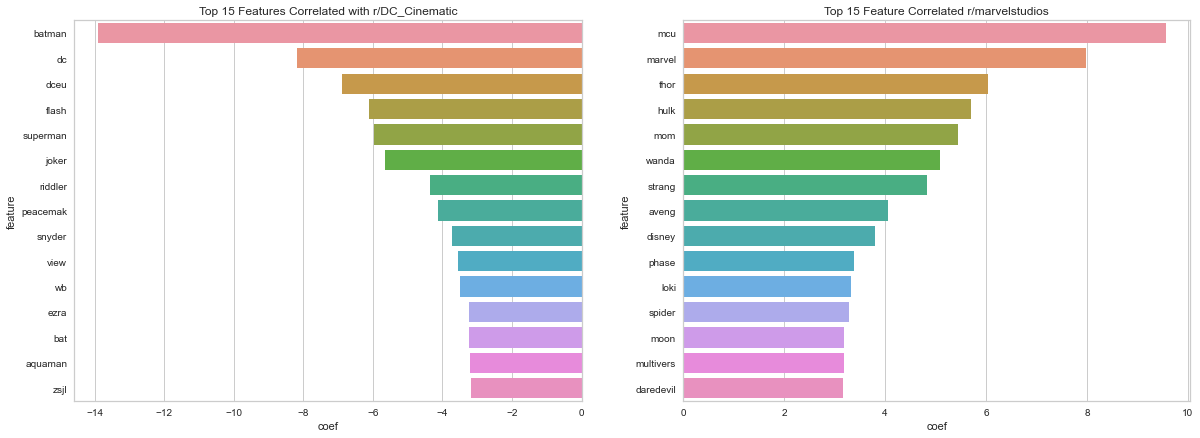

In [7]:
logr_gs_cvec, logr_gs_cvec_dict = gridsearch(pipe_cvec_logr,pipe_cvec_logr_params,5,X_train,y_train,X_test,y_test)
logr_gs_tvec, logr_gs_tvec_dict = gridsearch(pipe_tvec_logr,pipe_tvec_logr_params,5,X_train,y_train,X_test,y_test)

coefs = pd.DataFrame(logr_gs_tvec.best_estimator_.steps[1][1].coef_).T
coefs.columns = ['coef']
coefs['feature'] = logr_gs_tvec.best_estimator_.steps[0][1].get_feature_names()
coefs = coefs[['feature','coef']]
coefs = coefs.sort_values('coef', ascending=True)

top_dc_coefs = coefs.head(15).reset_index(drop=True)
top_marvel_coefs = coefs.tail(15).sort_values(by='coef', ascending=False).reset_index(drop=True)

fig, axs = plt.subplots(1, 2, figsize=(20,7))
axs[0].title.set_text('Top 15 Features Correlated with r/DC_Cinematic')
axs[1].title.set_text('Top 15 Feature Correlated r/marvelstudios')
# axs[0].yaxis.tick_right()
sns.barplot(data = top_dc_coefs, x = 'coef',y='feature',ax = axs[0])
sns.barplot(data = top_marvel_coefs, x = 'coef',y='feature',ax = axs[1])
plt.show();

#### 3.4.2 Multinominal Naive Bayes Model

- Interpretion of Multinomial Naive Bayes Model Coefficient was done with reference to notes found in the following link: https://donernesto.github.io/blog/notes-on-multinomial-naive-bayes/

Findings:
- Interesting finding in the top features of subreddit r/DC_Cinematic:
    - Most of the top 15 words are related to the character *batman*
- The smallest <code>min_df</code> has the best results for both transformer.
- <code>ngram_range=(1,2)</code> have the best results.

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   12.4s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.9s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.8s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.6s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.7s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.7s finished


Best parameter: {'cvec__min_df': 5, 'cvec__ngram_range': (1, 2), 'nb__alpha': 1}
Best training score: 0.9124220098801731
Cross Validation Score: 0.911967126867727
Test score: 0.9163419069888282

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   12.4s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.9s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   10.0s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.7s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.9s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.9s finished


Best parameter: {'nb__alpha': 0.1, 'tvec__min_df': 5, 'tvec__ngram_range': (1, 2)}
Best training score: 0.9137863001603221
Cross Validation Score: 0.9135261800948428
Test score: 0.9163419069888282



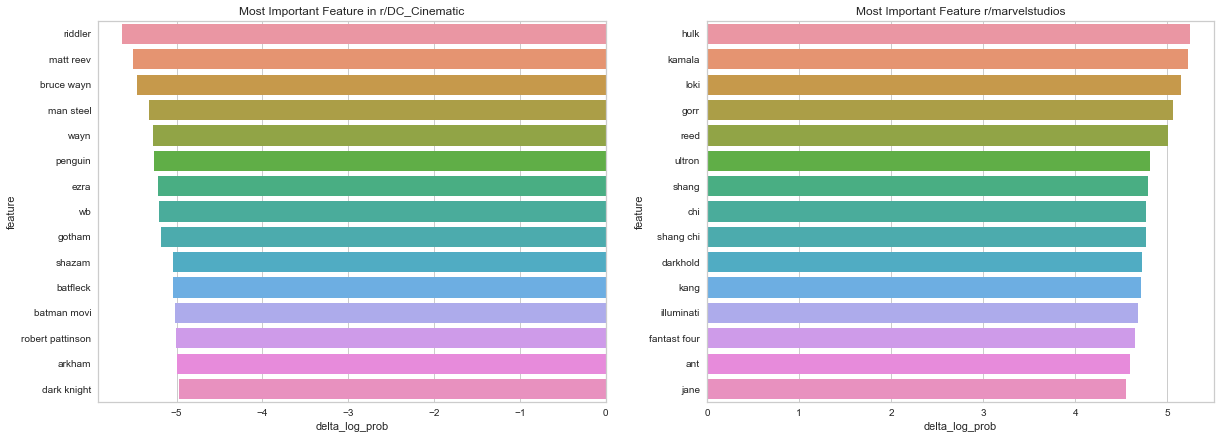

In [8]:
nb_gs_cvec, nb_gs_cvec_dict = gridsearch(pipe_cvec_nb,pipe_cvec_nb_params,5,X_train,y_train,X_test,y_test)
nb_gs_tvec, nb_gs_tvec_dict = gridsearch(pipe_tvec_nb,pipe_tvec_nb_params,5,X_train,y_train,X_test,y_test)

delta_log_prob = nb_gs_cvec.best_estimator_.steps[1][1].feature_log_prob_[1,:]- nb_gs_cvec.best_estimator_.steps[1][1].feature_log_prob_[0,:]

top_features = pd.DataFrame(nb_gs_cvec.best_estimator_.steps[0][1].get_feature_names(),columns=['feature'])
top_features['delta_log_prob'] = pd.DataFrame(delta_log_prob)
marvel_top_feature = top_features.sort_values('delta_log_prob',ascending=False).head(15)
dc_top_feature = top_features.sort_values('delta_log_prob',ascending=True).head(15)

fig, axs = plt.subplots(1, 2, figsize=(20,7))
axs[0].title.set_text('Most Important Feature in r/DC_Cinematic')
axs[1].title.set_text('Most Important Feature r/marvelstudios')
sns.barplot(data = dc_top_feature, x = 'delta_log_prob',y='feature',ax = axs[0])
sns.barplot(data = marvel_top_feature, x = 'delta_log_prob',y='feature',ax = axs[1])
plt.show();

#### 3.4.3 Random Forest Classification Model

Findings:
- The smallest <code>min_df</code> has the best results for both transformer.
- <code>ngram_range=(1,2)</code> have the best results.
- <code>max_depth=None</code> has the best results.

In [9]:
rf_gs_cvec, rf_gs_cvec_dict = gridsearch(pipe_cvec_rf,pipe_cvec_rf_params,5,X_train,y_train,X_test,y_test)
rf_gs_tvec, rf_gs_tvec_dict = gridsearch(pipe_tvec_rf,pipe_tvec_rf_params,5,X_train,y_train,X_test,y_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.0min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.5min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


Best parameter: {'cvec__min_df': 5, 'cvec__ngram_range': (1, 1), 'rf__max_depth': None, 'rf__n_estimators': 150}
Best training score: 0.9038462147212425
Cross Validation Score: 0.9042359094420883
Test score: 0.905429981813458

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.9min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.5min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.5min finished


Best parameter: {'rf__max_depth': None, 'rf__n_estimators': 100, 'tvec__min_df': 5, 'tvec__ngram_range': (1, 2)}
Best training score: 0.9052104838980277
Cross Validation Score: 0.9030012782307615
Test score: 0.9059495972979995



#### 3.4.4 Save Trained model

In [10]:
with open(f'./data/logr_gs_cvec.pkl', 'wb') as f:
    pickle.dump(logr_gs_cvec, f)
with open(f'./data/logr_gs_tvec.pkl', 'wb') as f:
    pickle.dump(logr_gs_tvec, f)
with open(f'./data/nb_gs_cvec.pkl', 'wb') as f:
    pickle.dump(nb_gs_cvec, f)
with open(f'./data/nb_gs_tvec.pkl', 'wb') as f:
    pickle.dump(nb_gs_tvec, f)
with open(f'./data/rf_gs_cvec.pkl', 'wb') as f:
    pickle.dump(rf_gs_cvec, f)
with open(f'./data/rf_gs_tvec.pkl', 'wb') as f:
    pickle.dump(rf_gs_tvec, f)


### 3.5 Model Comparison

---

- All 3 models perform very well with a score above 0.9

In [14]:
# Consolidate all the scores into a dataframe
model_score = []

model_score.append(logr_gs_cvec_dict)
model_score.append(logr_gs_tvec_dict)
model_score.append(nb_gs_cvec_dict)
model_score.append(nb_gs_tvec_dict)
model_score.append(rf_gs_cvec_dict)
model_score.append(rf_gs_tvec_dict)

model_score_df = pd.DataFrame(model_score,columns=['train_score','cv_score','test_score'],index =['logr_cvec','logr_tvec','nb_cvec','nb_tvec','rf_cvec','rf_tvec'])
model_score_df

,train_score,cv_score,test_score
logr_cvec,0.910798,0.910798,0.914783
logr_tvec,0.914306,0.914111,0.914783
nb_cvec,0.912422,0.911967,0.916342
nb_tvec,0.913786,0.913526,0.916342
rf_cvec,0.903846,0.904236,0.905430
rf_tvec,0.905210,0.903001,0.905950


## 4.0 Findings and Production Model Recommendation

---

- The model performs better with low <code>min_df</code>, meaning that it performs better with more features.
- Model from <code>GridSearchCV</code> are well fitted and was able to effectively classify post to *r/marvelstudios* & *r/DC_Cinematic*.
- Both transfromer perform very similarly.
- The model was able to out perform the baseline model.

Production Model Recommendation: **Logistic Regression**

- **Logistic regression model was recommended as the production model** for the following reasons:

    1. The logistic regression model achieve a very high accuracy score.
    
    2. The top features reflect a diverse superhero character within each comic/movies, which is good as a generalize model.
    3. Easier to interpret compared to random forest classification. 
    4. Naive Bayes model perform similarly well (slightly better as a matter of fact), but the model use the assumption of independence between words, which was clearly not the case as the most important features of r/DC_Cinematic was shown to be closely related to a single movie or character *batman*


---

# End of Book 3

In the next book, we will continue by running sentiment analysis with HuggingFace.